<a href="https://colab.research.google.com/github/solundo7456/EDA/blob/main/Respiratory_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

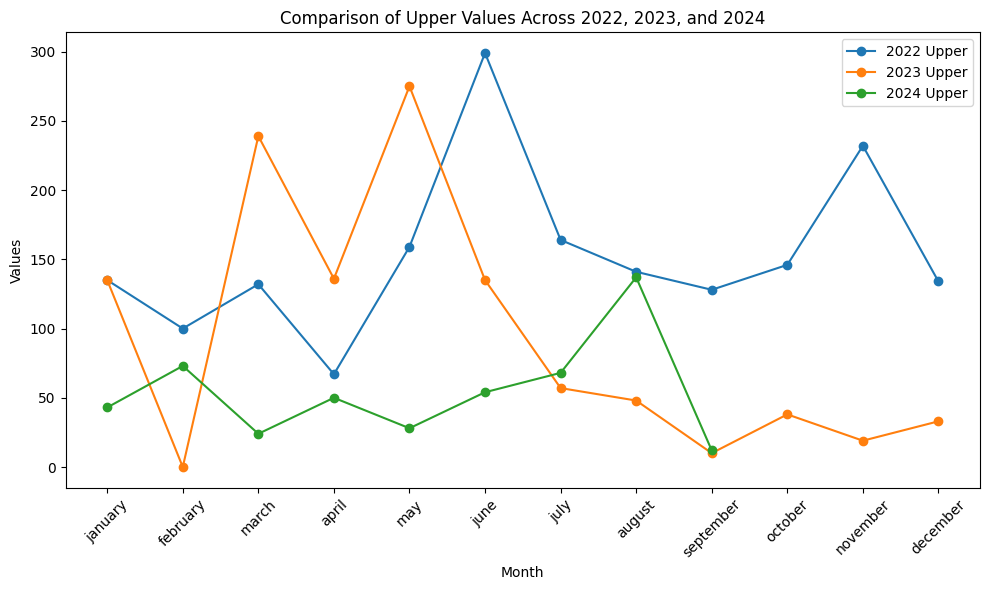

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/resp data.xlsx'
data = pd.read_excel(file_path)

# Clean the dataset: drop the first row and rename columns
data_cleaned = data.drop(0).reset_index(drop=True)
data_cleaned.columns = ['Month', '2022_upper', '2022_lower', '2023_upper', '2023_lower', '2024_upper', '2024_lower']

# Convert numerical columns from object to float
for col in ['2022_upper', '2022_lower', '2023_upper', '2023_lower', '2024_upper', '2024_lower']:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Plotting the comparison of upper values across years
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data for each year
ax.plot(data_cleaned['Month'], data_cleaned['2022_upper'], label='2022 Upper', marker='o')
ax.plot(data_cleaned['Month'], data_cleaned['2023_upper'], label='2023 Upper', marker='o')
ax.plot(data_cleaned['Month'], data_cleaned['2024_upper'], label='2024 Upper', marker='o')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Values')
ax.set_title('Comparison of Upper Values Across 2022, 2023, and 2024')
ax.legend()

# Rotate month labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Basic statistical summary of the data
summary = data_cleaned.describe()
print(summary)


       2022_upper  2022_lower  2023_upper  2023_lower  2024_upper  2024_lower
count   12.000000        12.0   12.000000   12.000000    9.000000    9.000000
mean   153.083333         0.0   93.750000    0.583333   54.333333    3.888889
std     60.198850         0.0   90.839644    1.083625   36.949290    6.679155
min     67.000000         0.0    0.000000    0.000000   12.000000    0.000000
25%    131.000000         0.0   29.500000    0.000000   28.000000    0.000000
50%    138.000000         0.0   52.500000    0.000000   50.000000    1.000000
75%    160.250000         0.0  135.250000    0.500000   68.000000    3.000000
max    299.000000         0.0  275.000000    3.000000  137.000000   19.000000


In [ ]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()
print(missing_values)


Month         0
2022_upper    0
2022_lower    0
2023_upper    0
2023_lower    0
2024_upper    3
2024_lower    3
dtype: int64


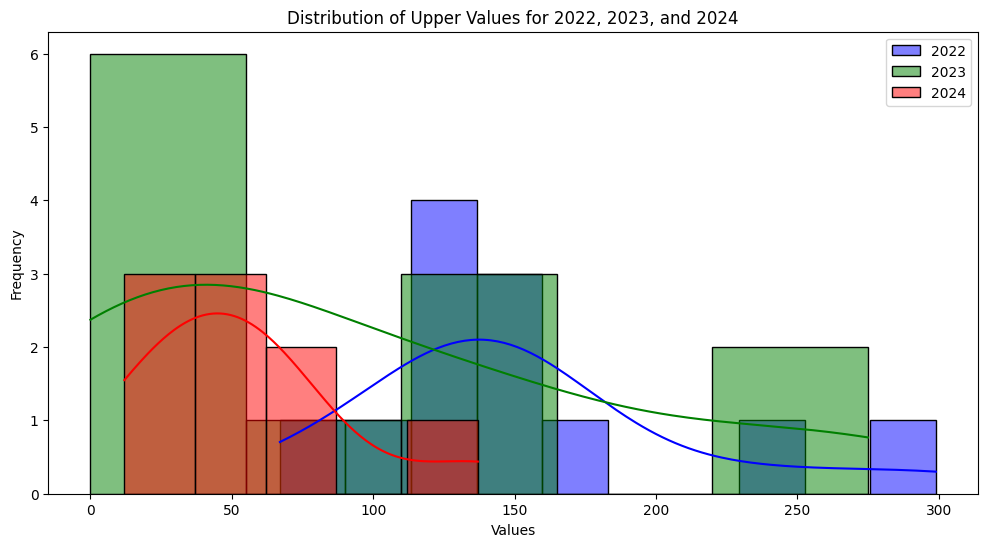

In [ ]:
import seaborn as sns

# Plot histograms for upper values across the years
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['2022_upper'], color='blue', label='2022', kde=True)
sns.histplot(data_cleaned['2023_upper'], color='green', label='2023', kde=True)
sns.histplot(data_cleaned['2024_upper'], color='red', label='2024', kde=True)

plt.title('Distribution of Upper Values for 2022, 2023, and 2024')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


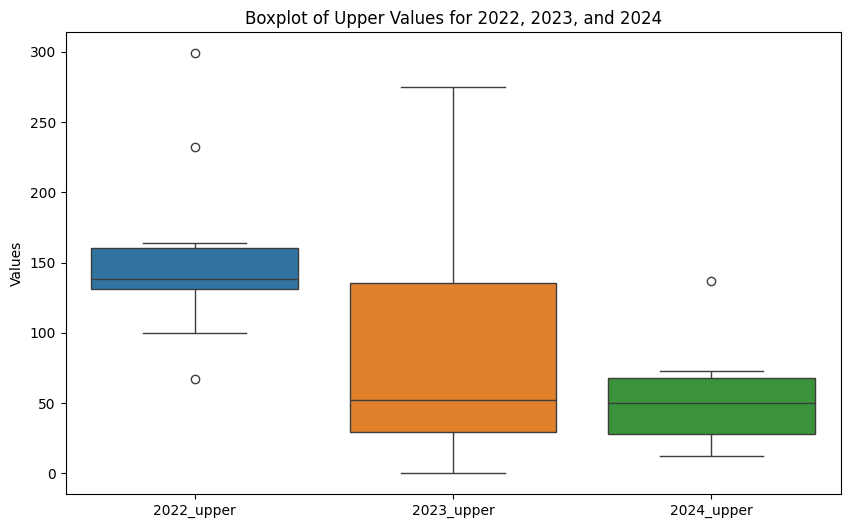

In [ ]:
# Boxplot to show the spread of upper values
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned[['2022_upper', '2023_upper', '2024_upper']])
plt.title('Boxplot of Upper Values for 2022, 2023, and 2024')
plt.ylabel('Values')
plt.show()


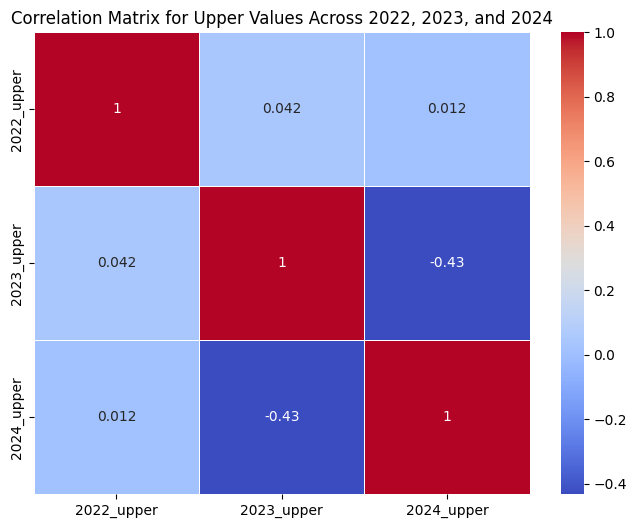

In [ ]:
# Correlation matrix
corr_matrix = data_cleaned[['2022_upper', '2023_upper', '2024_upper']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Upper Values Across 2022, 2023, and 2024')
plt.show()


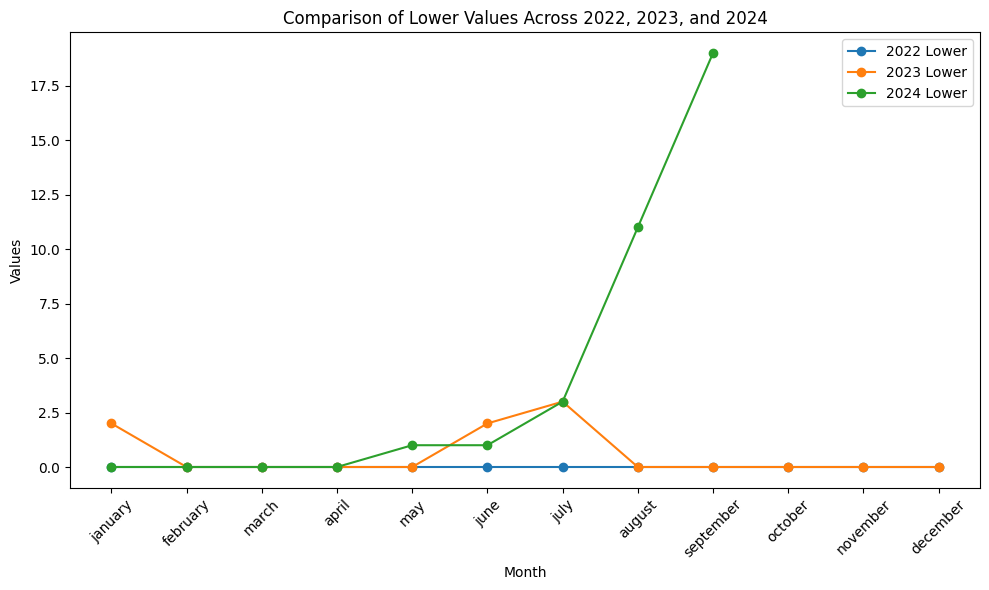

In [ ]:
# Plotting the comparison of lower values across years
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data for each year
ax.plot(data_cleaned['Month'], data_cleaned['2022_lower'], label='2022 Lower', marker='o')
ax.plot(data_cleaned['Month'], data_cleaned['2023_lower'], label='2023 Lower', marker='o')
ax.plot(data_cleaned['Month'], data_cleaned['2024_lower'], label='2024 Lower', marker='o')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Values')
ax.set_title('Comparison of Lower Values Across 2022, 2023, and 2024')
ax.legend()

# Rotate month labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Summary table of mean values for upper and lower data
mean_values = data_cleaned[['2022_upper', '2022_lower', '2023_upper', '2023_lower', '2024_upper', '2024_lower']].mean()
print(mean_values)


2022_upper    153.083333
2022_lower      0.000000
2023_upper     93.750000
2023_lower      0.583333
2024_upper     54.333333
2024_lower      3.888889
dtype: float64


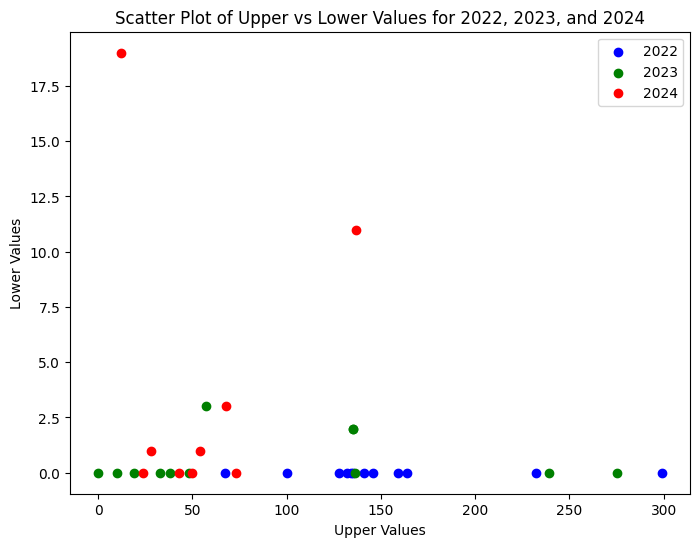

In [ ]:
# Scatter plot to observe relationships between 2022 upper and lower values
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['2022_upper'], data_cleaned['2022_lower'], color='blue', label='2022')
plt.scatter(data_cleaned['2023_upper'], data_cleaned['2023_lower'], color='green', label='2023')
plt.scatter(data_cleaned['2024_upper'], data_cleaned['2024_lower'], color='red', label='2024')

plt.title('Scatter Plot of Upper vs Lower Values for 2022, 2023, and 2024')
plt.xlabel('Upper Values')
plt.ylabel('Lower Values')
plt.legend()
plt.show()


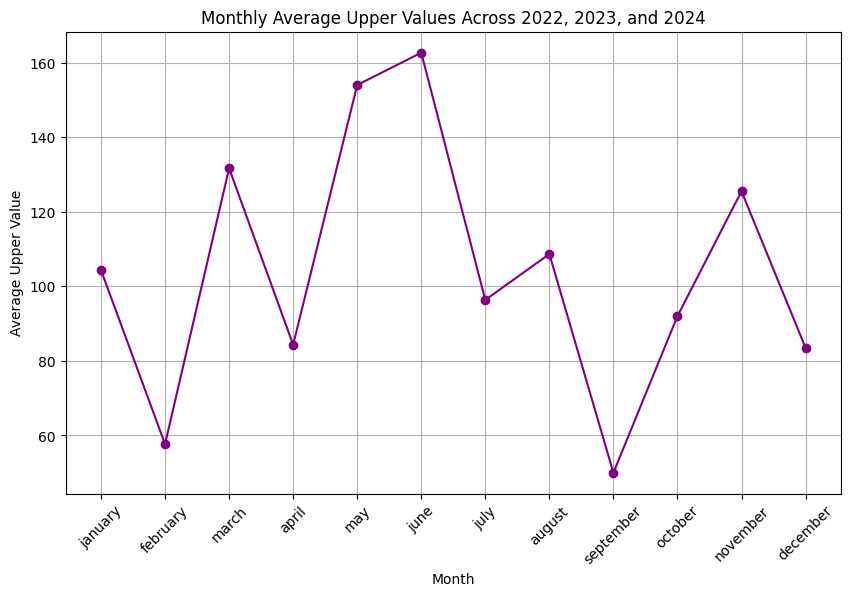

In [ ]:
# Calculate monthly averages for upper values
monthly_averages = data_cleaned[['2022_upper', '2023_upper', '2024_upper']].mean(axis=1)

# Plot monthly averages
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Month'], monthly_averages, marker='o', color='purple')
plt.title('Monthly Average Upper Values Across 2022, 2023, and 2024')
plt.xlabel('Month')
plt.ylabel('Average Upper Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


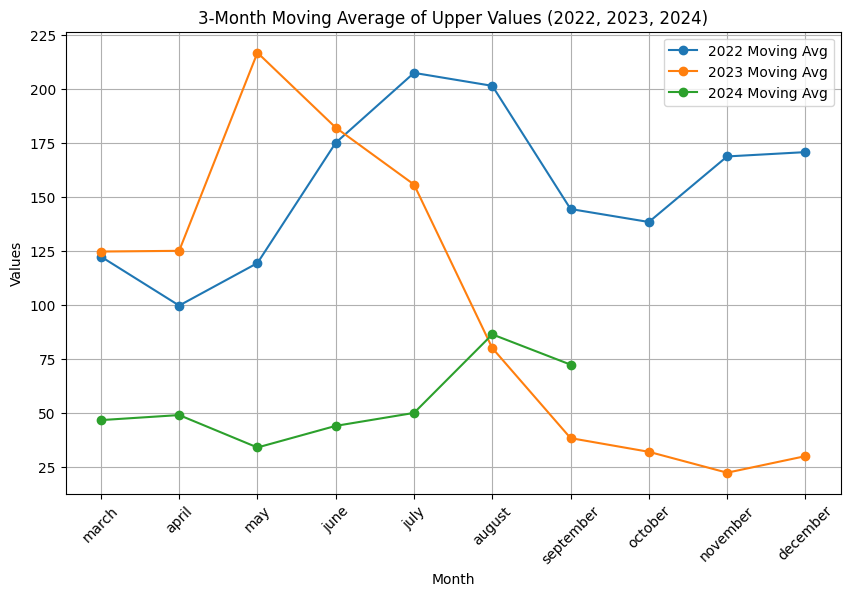

In [ ]:
# Compute 3-month moving average for upper values
data_cleaned['2022_upper_MA'] = data_cleaned['2022_upper'].rolling(window=3).mean()
data_cleaned['2023_upper_MA'] = data_cleaned['2023_upper'].rolling(window=3).mean()
data_cleaned['2024_upper_MA'] = data_cleaned['2024_upper'].rolling(window=3).mean()

# Plot the moving averages
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Month'], data_cleaned['2022_upper_MA'], label='2022 Moving Avg', marker='o')
plt.plot(data_cleaned['Month'], data_cleaned['2023_upper_MA'], label='2023 Moving Avg', marker='o')
plt.plot(data_cleaned['Month'], data_cleaned['2024_upper_MA'], label='2024 Moving Avg', marker='o')

plt.title('3-Month Moving Average of Upper Values (2022, 2023, 2024)')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


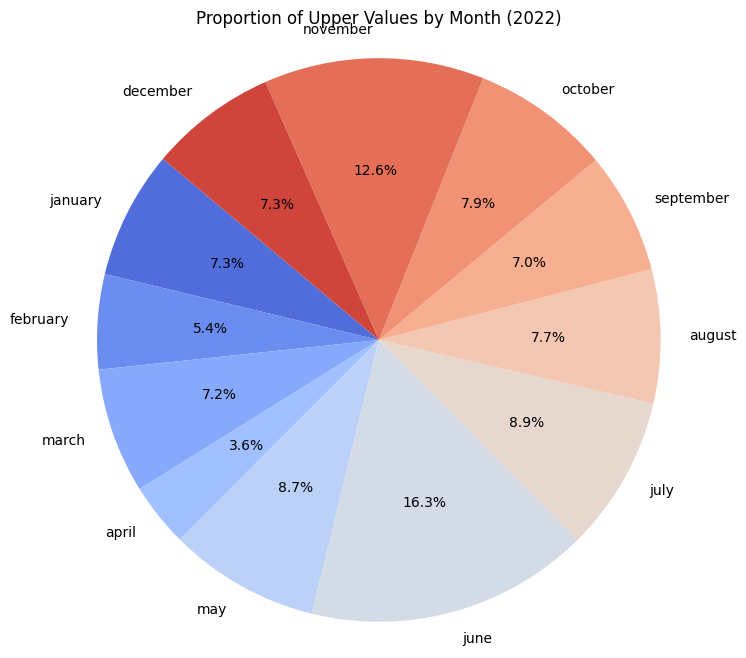

In [ ]:
# Pie chart for proportion of upper values for 2022
plt.figure(figsize=(8, 8))
plt.pie(data_cleaned['2022_upper'], labels=data_cleaned['Month'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(data_cleaned['Month'])))
plt.title('Proportion of Upper Values by Month (2022)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


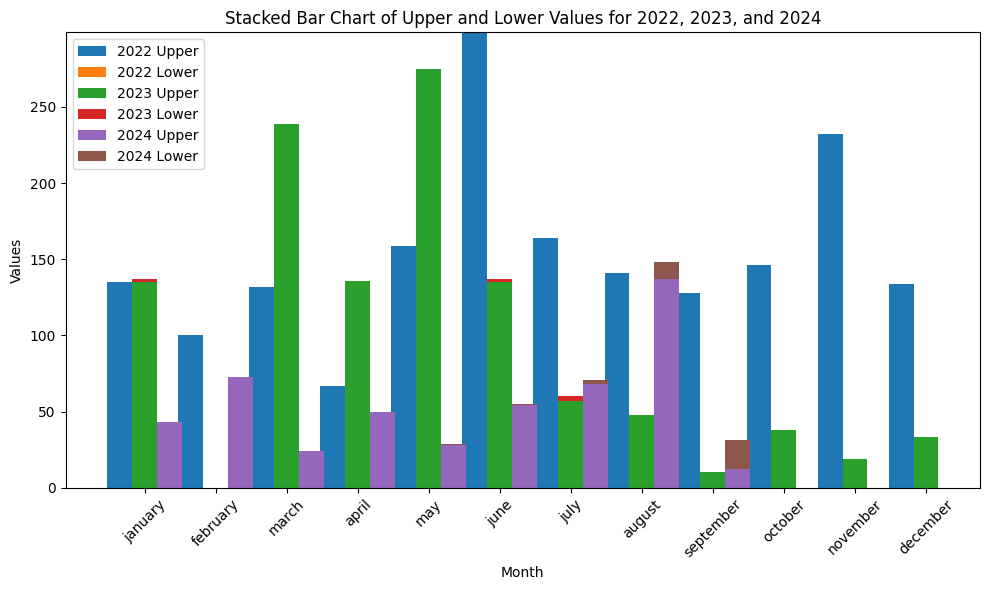

In [ ]:
# Plot stacked bar chart for upper and lower values for 2022, 2023, and 2024
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Plotting the stacked bars for each year
months = data_cleaned['Month']
index = range(len(months))

# 2022 Data
ax.bar(index, data_cleaned['2022_upper'], bar_width, label='2022 Upper')
ax.bar(index, data_cleaned['2022_lower'], bar_width, bottom=data_cleaned['2022_upper'], label='2022 Lower')

# 2023 Data
ax.bar([i + bar_width for i in index], data_cleaned['2023_upper'], bar_width, label='2023 Upper')
ax.bar([i + bar_width for i in index], data_cleaned['2023_lower'], bar_width, bottom=data_cleaned['2023_upper'], label='2023 Lower')

# 2024 Data
ax.bar([i + 2*bar_width for i in index], data_cleaned['2024_upper'], bar_width, label='2024 Upper')
ax.bar([i + 2*bar_width for i in index], data_cleaned['2024_lower'], bar_width, bottom=data_cleaned['2024_upper'], label='2024 Lower')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Chart of Upper and Lower Values for 2022, 2023, and 2024')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(months)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

# Z-scores for 2022 upper values
z_scores_2022 = stats.zscore(data_cleaned['2022_upper'])

# Identify outliers as points with Z-scores greater than 3 or less than -3
outliers_2022 = data_cleaned['Month'][abs(z_scores_2022) > 3]
print(f"Outliers in 2022 upper values: {outliers_2022}")


Outliers in 2022 upper values: Series([], Name: Month, dtype: object)


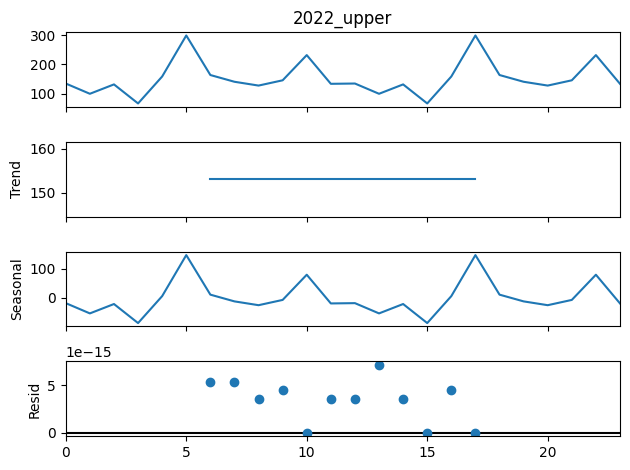

In [ ]:
# Extend the dataset by duplicating it to simulate more cycles
extended_data = pd.concat([data_cleaned] * 2, ignore_index=True)

# Perform seasonal decomposition with the extended data
decomposition = seasonal_decompose(extended_data['2022_upper'], model='additive', period=12)

# Plot decomposition
decomposition.plot()
plt.show()
